**Deutsch-Jozsa Algorithm**

**Problem Statement**  
The Deutsch-Jozsa problem seeks to determine whether a given function $f(x)$ is constant or balanced (assuming that $f(x)$ must be either constant or balanced):

- **Constant Function:** $f(x)$ returns the same value (0 or 1) for all inputs.
- **Balanced Function:** $f(x)$ returns 0 for 50% of inputs and 1 for 50% of inputs.

**Classical Approach**  
In the classical setting, solving this problem requires evaluating the function on more than half of the possible inputs to be certain whether the function is constant or balanced. For an $n$-bit input, this would require $2^{n-1} + 1$ function evaluations in the worst case.

**Quantum Approach: The Deutsch-Jozsa Algorithm**

**1. Initialization**

We start with \( n+1 \) qubits. The first \( n \) qubits are initialized to \( |0\rangle \) and the last qubit (the oracle qubit) to \( |1\rangle \):

$$
|0\rangle^{\otimes n} \otimes |1\rangle
$$

**2. Apply Hadamard Gates**

Apply Hadamard gates $H^{\otimes (n+1)}$ to all qubits:

$$
H^{\otimes n} |0\rangle^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle
$$

$$
H |1\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
$$

The full state after Hadamard gates:

$$
\frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \otimes \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
$$

**3. Apply the Oracle Function \( U_f \)**

The oracle function $U_f$ applies the operation:

$$
U_f |x\rangle |y\rangle = |x\rangle |y \oplus f(x)\rangle
$$

Substitute $y$ with the state $\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$:

- If $f(x) = 0$:

$$
|x\rangle \left(\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\right)
$$

- If $f(x) = 1$:

$$
|x\rangle \left(\frac{1}{\sqrt{2}}(|1\rangle - |0\rangle)\right) = -|x\rangle \left(\frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)\right)
$$

The resulting state is:

$$
\frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} |x\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

**4. Apply Hadamard Gates Again**

Apply Hadamard gates $H^{\otimes n}$ to the first $n$ qubits:

$$
H^{\otimes n} \left(\frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} |x\rangle\right) 
$$

This becomes:

$$
\frac{1}{2^n} \sum_{z=0}^{2^n-1} \sum_{x=0}^{2^n-1} (-1)^{x \cdot z \oplus f(x)} |z\rangle
$$

**5. Measurement and Result**

- If $f(x)$ is constant, the amplitude for $|z=0\rangle$ will be 1, and all other states will have an amplitude of 0:

$$
|0\rangle^{\otimes n}
$$

- If $f(x)$ is balanced, the amplitudes interfere destructively, resulting in a non-zero $z$:

$$
|z\rangle \text{ where } z \neq 0
$$

**Intuition**

**Superposition**

After applying the initial Hadamard gates to the $n$ qubits, each qubit is placed in a superposition of 0 and 1. This results in the entire system being in a superposition of all possible inputs simultaneously:

$$
\frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle
$$

This superposition allows the quantum computer to evaluate the function $f(x)$ for all possible inputs in parallel, a key feature that enables quantum parallelism.

**Phase Kickback**

The **phase kickback** phenomenon is crucial in how the Deutsch-Jozsa algorithm works. When the oracle $U_f$ is applied, it affects the state of the system by flipping the phase of the states based on the function $f(x)$. This is expressed as:

$$
U_f |x\rangle |y\rangle = |x\rangle |y \oplus f(x)\rangle
$$

In cases where the function $f(x)$ returns 1, the state $|x\rangle$ is multiplied by a phase factor of $-1$, but the output qubit's state remains unchanged (due to $y \oplus 1$). This phase information is "kicked back" to the input qubits. The effect of this kickback is that the phase of the input state is altered according to the function $f(x)$:

$$
|x\rangle \rightarrow (-1)^{f(x)} |x\rangle
$$

This phase kickback is what allows the Hadamard transform, applied later, to interfere constructively or destructively, depending on whether the function is constant or balanced.

**Entanglement via Hadamard and Controlled Gates**

The use of Hadamard gates followed by controlled operations in the Deutsch-Jozsa algorithm creates entanglement between the input qubits and the output qubit.

- **Hadamard Gates:** When the Hadamard gate is applied to the qubits, it creates an equal superposition of all possible states. This superposition is a necessary step before applying the oracle.

- **Controlled Gates:** When the controlled-U operation (like the controlled-NOT or CNOT gate) is applied within the oracle, it can entangle the input qubits with the output qubit. For example, in the balanced oracle, a CNOT gate entangles the input qubits with the output qubit such that the overall state reflects the function’s behavior across all inputs.

Entanglement is critical because it correlates the states of qubits in a way that classical bits cannot achieve. This entanglement, combined with the superposition and phase kickback, ensures that the quantum state after applying the oracle contains global information about the function $f(x)$.

**Constructive and Destructive Interference**

After the oracle is applied, a second round of Hadamard gates is applied to the input qubits. The Hadamard transform of a qubit in superposition can either amplify (constructive interference) or cancel out (destructive interference) the amplitudes of certain states.

- **Constructive Interference:** If $f(x)$ is constant, all phases will be the same, leading to constructive interference in the $z = 0$ state, where all input qubits measure 0.
- **Destructive Interference:** If $f(x)$ is balanced, the phase differences will cause destructive interference for the $z = 0$ state, leading to a non-zero measurement outcome.

The outcome of the measurement directly reflects whether the function is constant or balanced, with just one query to the oracle.


In [46]:
import random

# randomly determine whether constant or balanced (can also specify manually)
oracle_type = random.choice(['constant', 'balanced'])
oracle_type

'constant'

In [47]:
from qiskit import QuantumCircuit

n = 4
circuit = QuantumCircuit(n+1, n)

# flip oracle output qubit to initialize to 1
circuit.x(n)

# apply hadamard to all qubits
circuit.h(range(n)) # for input qubits
circuit.h(n) # for oracle output qubit

if oracle_type == 'balanced':

    # define a balanced oracle
    for q in range(n):
        circuit.cx(q, n)

else:

    # define a constant oracle
    out = random.choice([0, 1])
    if out == 1:
        circuit.x(n) # flip oracle qubit

# apply hadamard to input qubits
circuit.h(range(n))

circuit.measure(range(n), range(n))

circuit.draw()

┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├┤ H ├─────┤M├─────────
     ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├┤ H ├──────╫─┤M├──────
     ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤ H ├──────╫──╫─┤M├───
     ├───┤├───┤      ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ H ├──────╫──╫──╫─┤M├
     ├───┤├───┤┌───┐ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├─╫──╫──╫──╫─
     └───┘└───┘└───┘ ║  ║  ║  ║ 
c: 4/════════════════╩══╩══╩══╩═
                     0  1  2  3

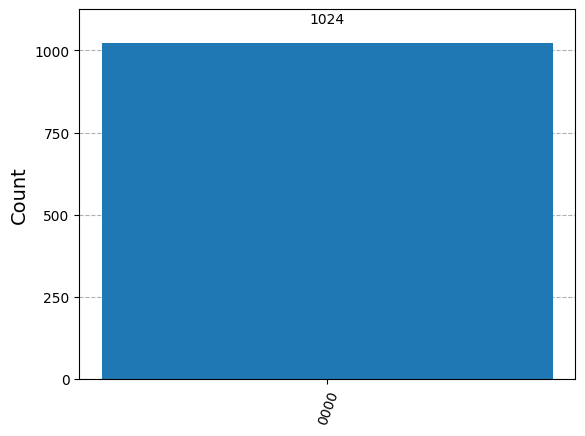

In [48]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()

compiled_circuit = transpile(circuit, simulator)

res = simulator.run(compiled_circuit).result()
counts = res.get_counts()

plot_histogram(counts)